<a href="https://www.kaggle.com/code/eavprog/abscur-pred-one-one?scriptVersionId=152642518" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Прогнозирование абсолютного курса одной валюты с использованием всех имеющихся

# Загрузка библиотек

In [1]:
!pip install fedot==0.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 92.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 47.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 3.4 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=26619d546f609e22167bb7b3a5a1d54f778e8925a10b7fdc473a8b32808da063
  Stored in directory: /root

In [2]:
# Plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import time
import pickle

In [3]:
# Prerocessing for FEDOT
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

from fedot.core.data.data_split import train_test_data_setup
from fedot.core.data.multi_modal import MultiModalData

# FEDOT 
from fedot.core.pipelines.pipeline import Pipeline
from fedot.api.main import Fedot

import logging
logging.raiseExceptions = False

# Импорт данных

In [4]:
abscur_data = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col='Date')
abscur_data

,AUD,HKD,JPY,SEK,USD,CAD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,12.158927,1.818914,0.119264,1.897071,14.116199,12.507799,14.600476,17.558665,2.298412,0.637008,...,0.139144,4.185057,3.876479,3.966004,3.762815,0.430110,6.332406,0.455729,0.937299,0.000663
2014-11-25,12.043264,1.818939,0.119656,1.901471,14.117639,12.535910,14.637383,17.609111,2.300727,0.638920,...,0.138817,4.219637,3.876875,3.979041,3.763299,0.430416,6.362736,0.456409,0.940737,0.000661
2014-11-26,12.044823,1.817974,0.119893,1.907327,14.106088,12.535146,14.672531,17.641253,2.297930,0.640013,...,0.138703,4.223000,3.874767,3.999798,3.759318,0.430852,6.384001,0.456582,0.942102,0.000660
2014-11-27,12.057547,1.823940,0.119975,1.903116,14.144001,12.473354,14.664765,17.626838,2.303424,0.638721,...,0.139076,4.219067,3.885181,3.987370,3.769422,0.431614,6.411605,0.457809,0.944634,0.000662
2014-11-28,12.072960,1.829111,0.119496,1.909429,14.198456,12.434329,14.707594,17.678609,2.311224,0.640543,...,0.139817,4.241510,3.899925,3.997313,3.783430,0.432484,6.396277,0.458310,0.948524,0.000667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,14.009151,2.748457,0.143032,2.046142,21.404006,15.642807,24.216610,23.319722,2.996373,0.954875,...,0.074709,5.340601,5.880221,4.690878,5.710171,0.607723,0.743298,0.680010,0.585289,0.000884
2023-11-23,14.030948,2.745236,0.143011,2.041594,21.389070,15.617032,24.200285,23.326065,2.995196,0.956601,...,0.074656,5.345263,5.876118,4.696147,5.706187,0.607644,0.743202,0.679536,0.584880,0.000884
2023-11-24,14.060396,2.744718,0.142991,2.045899,21.365278,15.652926,24.224058,23.358993,2.989986,0.959063,...,0.074573,5.359004,5.869582,4.688555,5.699839,0.605592,0.740765,0.678780,0.584230,0.000883


# Загрузка истории

In [5]:
!cp -r /kaggle/input/abscur-pred-one-one/*.png .

In [6]:
try:
    with open("/kaggle/input/abscur-pred-one-one/history.pickle", "rb") as file:
        history = pickle.load(file)
except:
    history = []
# history

# Цикл


======================================== COP ========================================
2023-11-28 02:55:42,913 - Unknown integration target: 
2023-11-28 02:55:48,362 - Unknown integration target: 
2023-11-28 02:55:54,092 - Unknown integration target: 
2023-11-28 02:55:59,470 - Unknown integration target: 
2023-11-28 02:56:04,869 - Unknown integration target: 
2023-11-28 02:56:16,780 - Unknown integration target: 
2023-11-28 02:56:28,676 - Unknown integration target: 
2023-11-28 02:56:40,739 - Unknown integration target: 
2023-11-28 02:56:42,569 - Unknown integration target: 
2023-11-28 02:56:42,572 - Unknown integration target: 
2023-11-28 02:56:49,616 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 261.6 MiB, max: 263.1 MiB
2023-11-28 02:56:49,629 - ApiComposer - Initial pipeline was fitted in 5.2 sec.
2023-11-28 02:56:49,632 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
20

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-28 03:12:47,377 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [15:57<?, ?gen/s]

2023-11-28 03:12:47,403 - ApiComposer - Hyperparameters tuning started with 9 min. timeout


2023-11-28 03:13:06,737 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [adareg, ridge, ridge, glm, data_source_ts/COP, ridge, lagged, linear, decompose]}
adareg - {}
ridge - {'alpha': 2.3323504259229555}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/COP - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.000
  0%|          | 20/100000 [05:02<839:53:31, 30.24s/trial, best loss: 1.7426714901879468e-05]
2023-11-28 03:22:37,105 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [adareg, ridge, ridge, glm, data_source_ts/COP, ridge, lagged, linear, decompose]}
adareg - {'learning_rate': 0.06403768742508509, 'loss': 'linear'}
ridge - {'alpha': 0.6923047834480397}
ridge - {'alpha': 1.8036348512096527}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
data_source_ts/COP - {}
ridge - {'alpha': 2.6657603741664233}
lagged - {'window_size': 496}
linear - {}
decompose - {}
2023-11-28 03

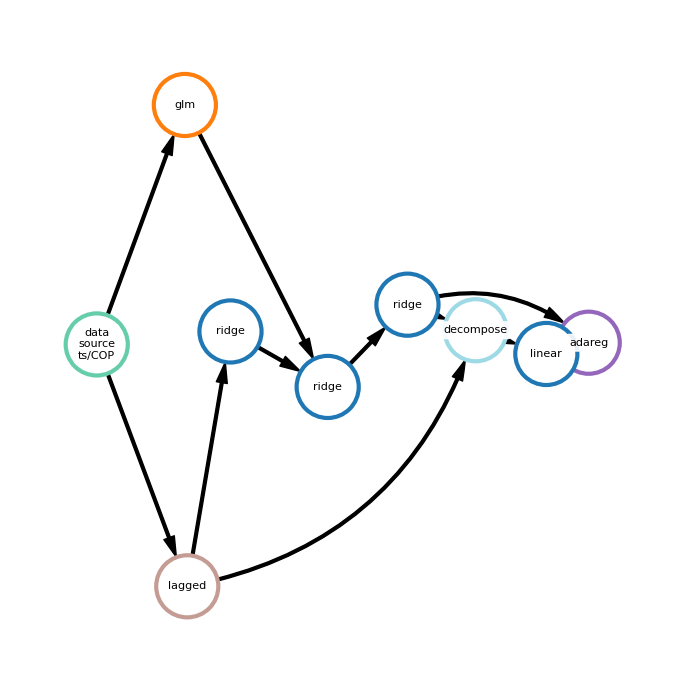

[0.00428257 0.00428803 0.00428214 0.00427652 0.00427829 0.00427556]
{'mae': 0.0, 'mape': 0.007}


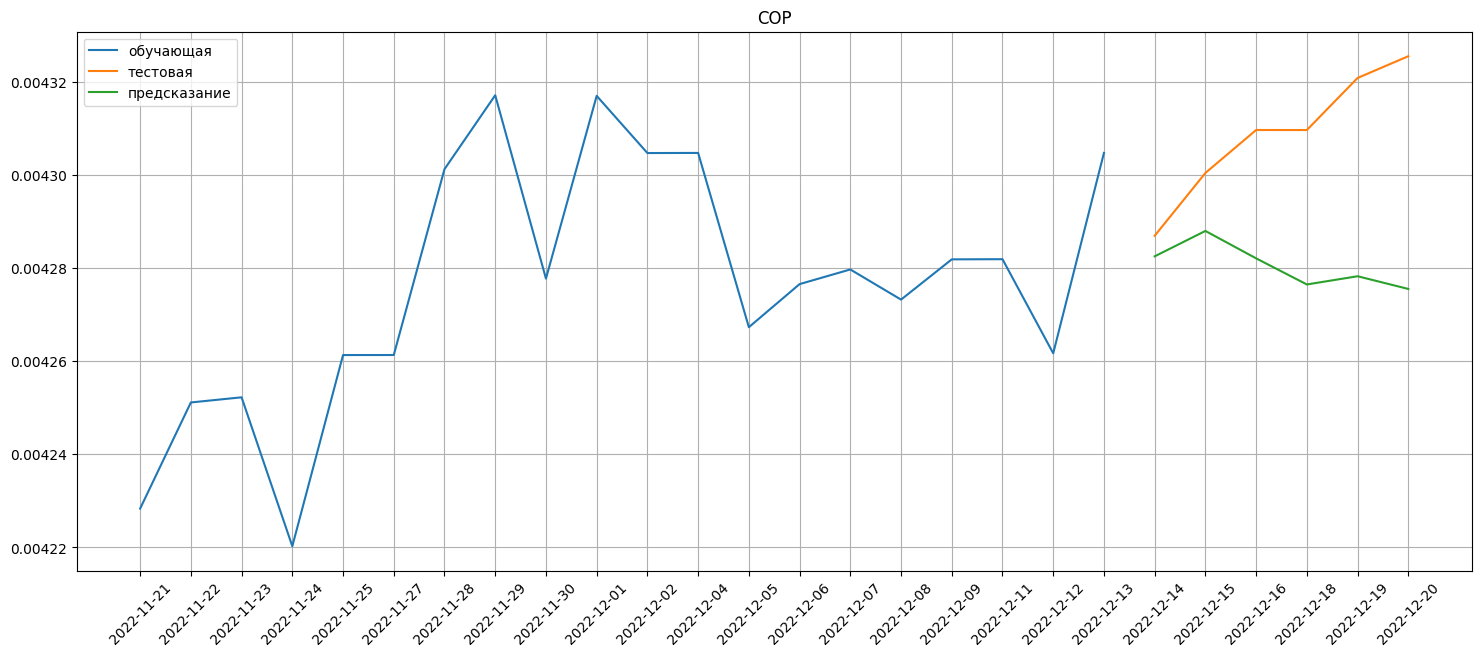


======================================== KRW ========================================
2023-11-28 03:23:30,487 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.0 MiB
2023-11-28 03:23:30,492 - ApiComposer - Initial pipeline was fitted in 11.0 sec.
2023-11-28 03:23:30,496 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-28 03:23:30,515 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 44 min. Set of candidate models: ['gaussian_filter', 'sparse_lagged', 'diff_filter', 'polyfit', 'smoothing', 'ets', 'lagged', 'ts_naive_average', 'cut', 'arima', 'stl_arima', 'clstm', 'locf', 'glm', 'ar', 'linear', 'gaussian_filter', 'diff_filter', 'ridge', 'smoothing', 'isolation_forest_reg', 'clstm', 'poly_features', 'ransac_lin_reg', 'glm', 'ransac_non_lin_reg', 'lgbmreg', 'svr', 'fast_ica', 'polyfit', 'exog_ts', 'ts_naive_average', 'scaling', 'adareg'

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-28 03:49:55,233 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [26:24<?, ?gen/s]

2023-11-28 03:49:55,264 - ApiComposer - Hyperparameters tuning started with 17 min. timeout


2023-11-28 03:53:43,782 - PipelineTuner - Initial pipeline: {'depth': 12, 'length': 13, 'nodes': [svr, rfr, treg, linear, glm, data_source_ts/KRW, lagged, linear, decompose, linear, decompose, linear, decompose]}
svr - {}
rfr - {'n_jobs': -1}
treg - {}
linear - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/KRW - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
linear - {}
decompose - {}
linear - {}
decompose - {} 
Initial metric: 0.000
 60%|██████    | 6/10 [19:15<12:50, 192.60s/trial, best loss: 0.016078901389330866]
2023-11-28 04:12:59,481 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-11-28 04:16:18,989 - PipelineTuner - Final pipeline: {'depth': 12, 'length': 13, 'nodes': [svr, rfr, treg, linear, glm, data_source_ts/KRW, lagged, linear, decompose, linear, decompose, linear, decompose]}
svr - {}
rfr - {'n_jobs': -1}
treg - {}
linear - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/KRW - {}
lagged -

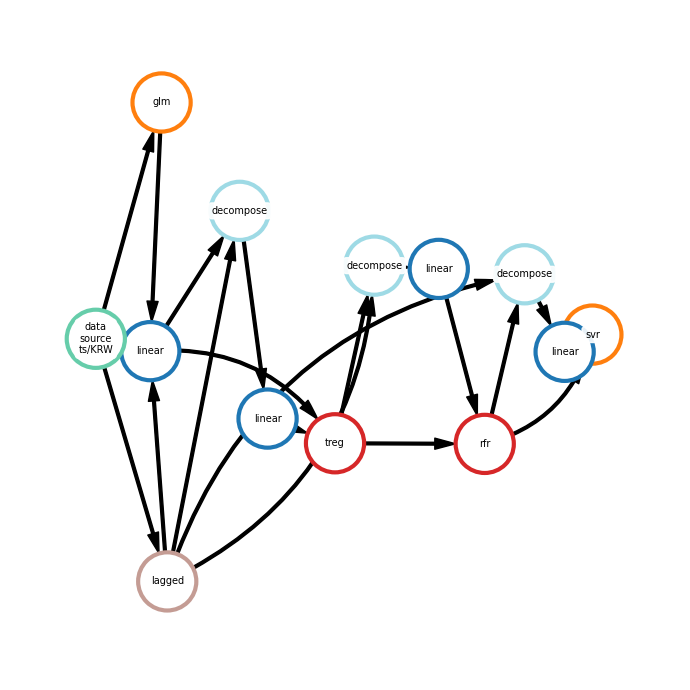

[0.01633541 0.01635444 0.01634514 0.01624736 0.01630999 0.01629846
 0.01627679]
{'mae': 0.0, 'mape': 0.004}


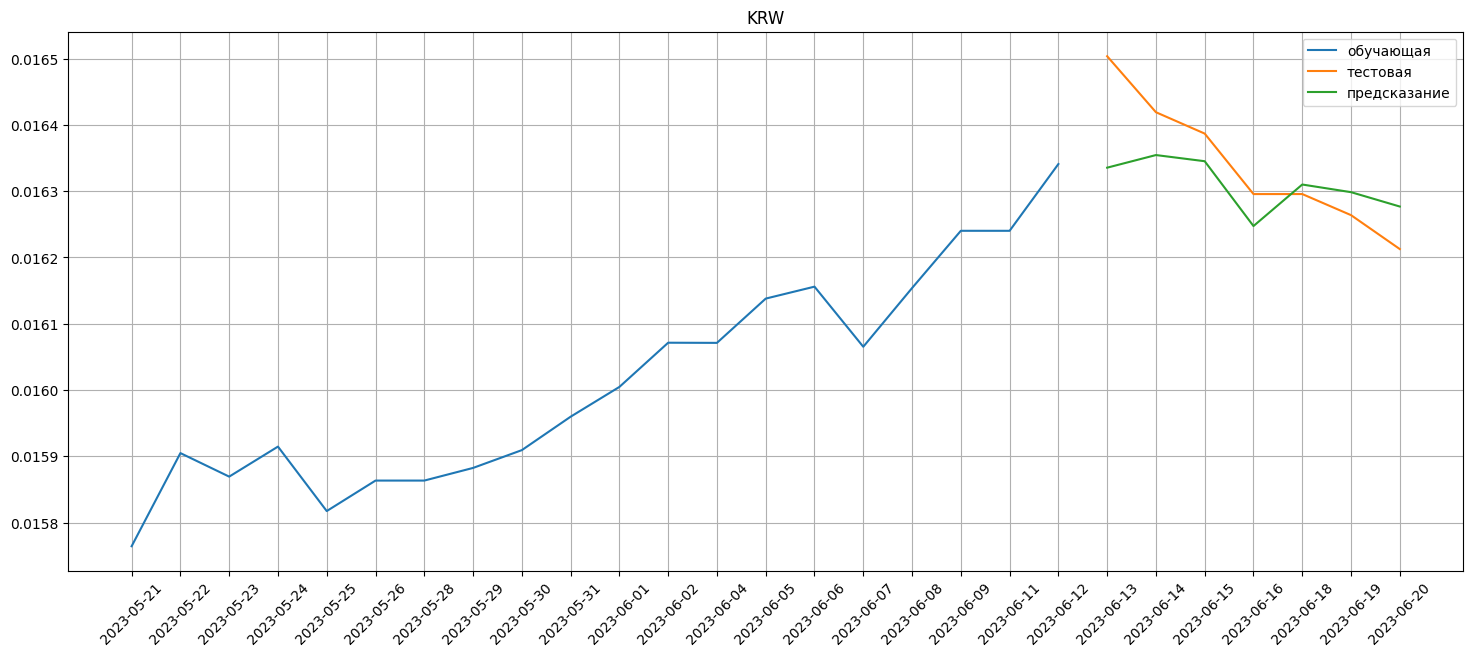


======================================== CAD ========================================
2023-11-28 04:22:53,559 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.5 MiB
2023-11-28 04:22:53,564 - ApiComposer - Initial pipeline was fitted in 11.1 sec.
2023-11-28 04:22:53,568 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-28 04:22:53,608 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 39 min. Set of candidate models: ['gaussian_filter', 'sparse_lagged', 'diff_filter', 'polyfit', 'smoothing', 'ets', 'lagged', 'ts_naive_average', 'cut', 'arima', 'stl_arima', 'clstm', 'locf', 'glm', 'ar', 'linear', 'gaussian_filter', 'diff_filter', 'ridge', 'smoothing', 'isolation_forest_reg', 'clstm', 'poly_features', 'ransac_lin_reg', 'glm', 'ransac_non_lin_reg', 'lgbmreg', 'svr', 'fast_ica', 'polyfit', 'exog_ts', 'ts_naive_average', 'scaling', 'adareg'

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-28 04:46:01,599 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [23:07<?, ?gen/s]

2023-11-28 04:46:01,629 - ApiComposer - Hyperparameters tuning started with 16 min. timeout


2023-11-28 04:46:12,307 - PipelineTuner - Initial pipeline: {'depth': 6, 'length': 7, 'nodes': [ridge, ridge, ridge, glm, data_source_ts/CAD, ridge, sparse_lagged]}
ridge - {'alpha': 9.547536891772335}
ridge - {'alpha': 7.746805858964927}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/CAD - {}
ridge - {}
sparse_lagged - {'window_size': 9.878825742688047, 'n_components': 0.24229393015097067, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 0.037
  0%|          | 65/100000 [13:56<422:22:43, 15.22s/trial, best loss: 0.036810208053238334]
2023-11-28 05:01:55,776 - PipelineTuner - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [ridge, ridge, ridge, glm, data_source_ts/CAD, ridge, sparse_lagged]}
ridge - {'alpha': 9.547536891772335}
ridge - {'alpha': 7.746805858964927}
ridge - {'alpha': 7.936776551254764}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
data_source_ts/CAD - {}
ridge - {'alpha': 8.9599341243761}
sparse_lagged - {'window

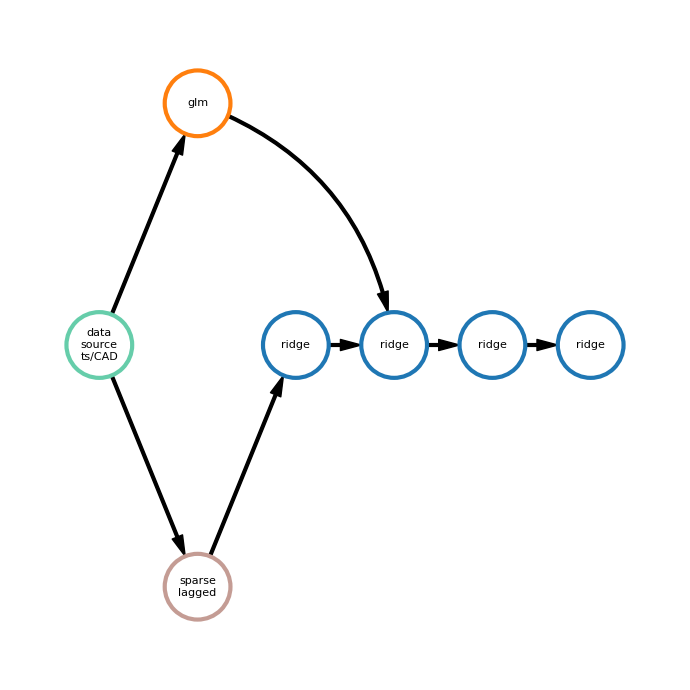

[15.70627888 15.7085046  15.71061546 15.71270934 15.71485428 15.71701848
 15.71926466 15.72135127 15.72364944 15.72590608 15.72825921]
{'mae': 0.077, 'mape': 0.005}


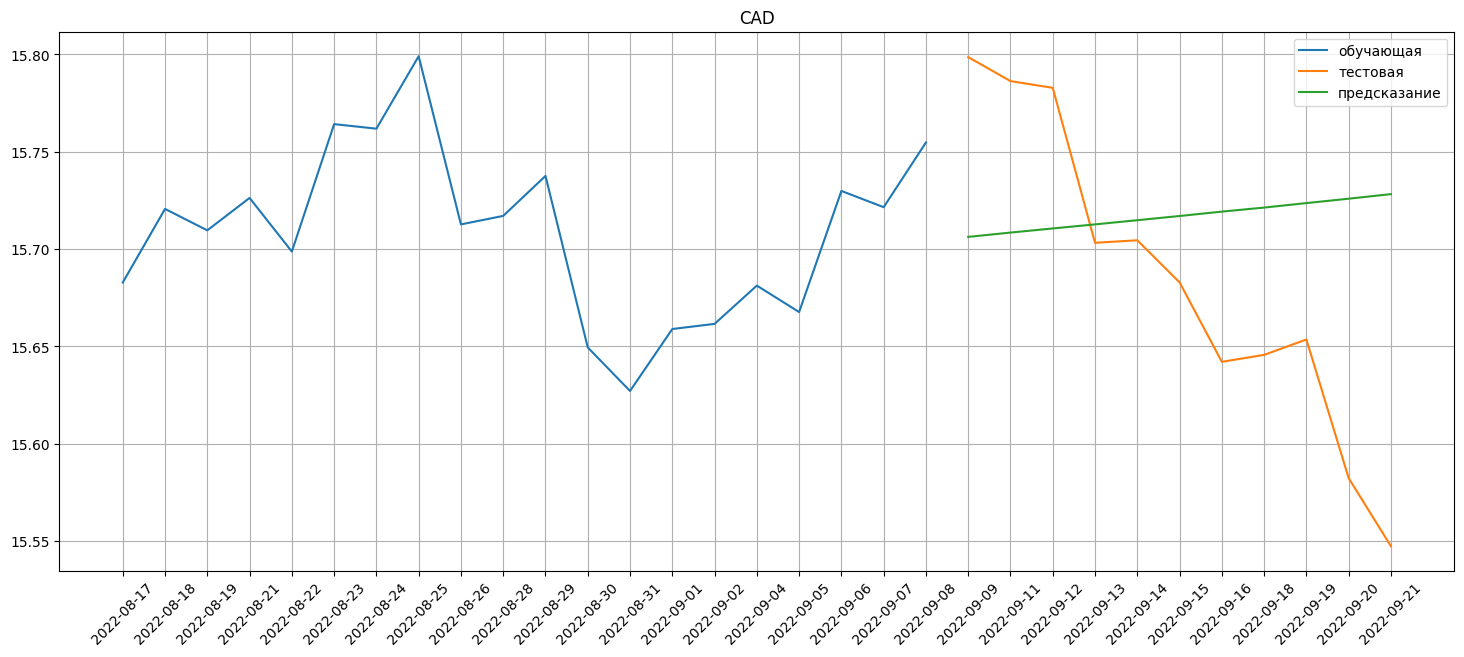


======================================== EGP ========================================
2023-11-28 05:02:38,071 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.0 MiB
2023-11-28 05:02:38,074 - ApiComposer - Initial pipeline was fitted in 10.2 sec.
2023-11-28 05:02:38,076 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-28 05:02:38,099 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 34 min. Set of candidate models: ['gaussian_filter', 'sparse_lagged', 'diff_filter', 'polyfit', 'smoothing', 'ets', 'lagged', 'ts_naive_average', 'cut', 'arima', 'stl_arima', 'clstm', 'locf', 'glm', 'ar', 'linear', 'gaussian_filter', 'diff_filter', 'ridge', 'smoothing', 'isolation_forest_reg', 'clstm', 'poly_features', 'ransac_lin_reg', 'glm', 'ransac_non_lin_reg', 'lgbmreg', 'svr', 'fast_ica', 'polyfit', 'exog_ts', 'ts_naive_average', 'scaling', 'adareg'

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-28 05:23:25,254 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [20:47<?, ?gen/s]

2023-11-28 05:23:25,291 - ApiComposer - Hyperparameters tuning started with 13 min. timeout


2023-11-28 05:24:31,172 - PipelineTuner - Initial pipeline: {'depth': 12, 'length': 13, 'nodes': [sgdr, rfr, ridge, ridge, adareg, glm, data_source_ts/EGP, ridge, lagged, linear, decompose, treg, decompose]}
sgdr - {}
rfr - {'n_jobs': -1}
ridge - {'alpha': 6.319102225644099}
ridge - {}
adareg - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/EGP - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
treg - {}
decompose - {} 
Initial metric: 0.022
100%|██████████| 10/10 [13:54<00:00, 83.42s/trial, best loss: 0.006726013826624902]
2023-11-28 05:38:25,391 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-11-28 05:39:54,384 - PipelineTuner - Final pipeline: {'depth': 12, 'length': 13, 'nodes': [sgdr, rfr, ridge, ridge, adareg, glm, data_source_ts/EGP, ridge, lagged, linear, decompose, treg, decompose]}
sgdr - {}
rfr - {'n_jobs': -1, 'bootstrap': False, 'max_features': 0.8723134773030105, 'min_samples_leaf': 15, 'min_sample

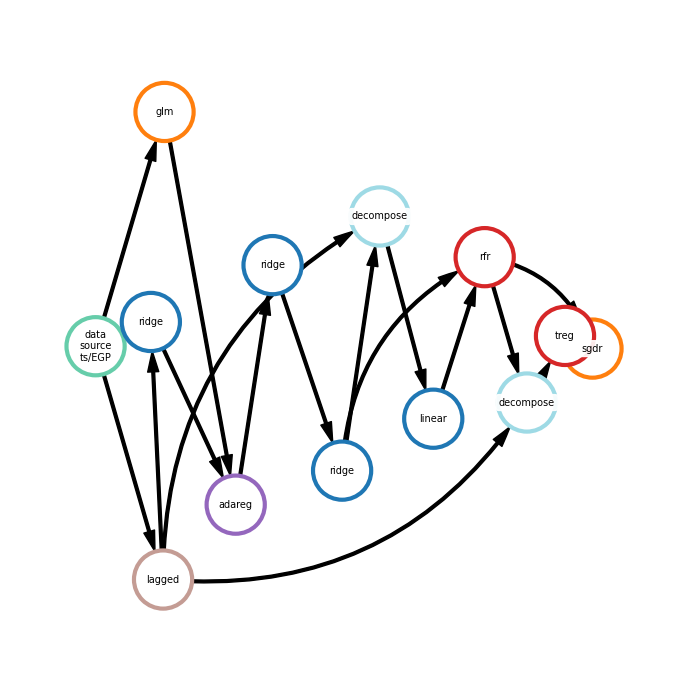

[1.04789912 1.05023364 1.0477654  1.0496191  1.05042411 1.04960642
 1.0486851  1.05076958 1.05284056 1.05081947 1.04899824 1.05099708
 1.0440253  1.05448456 1.05053647]
{'mae': 0.007, 'mape': 0.007}


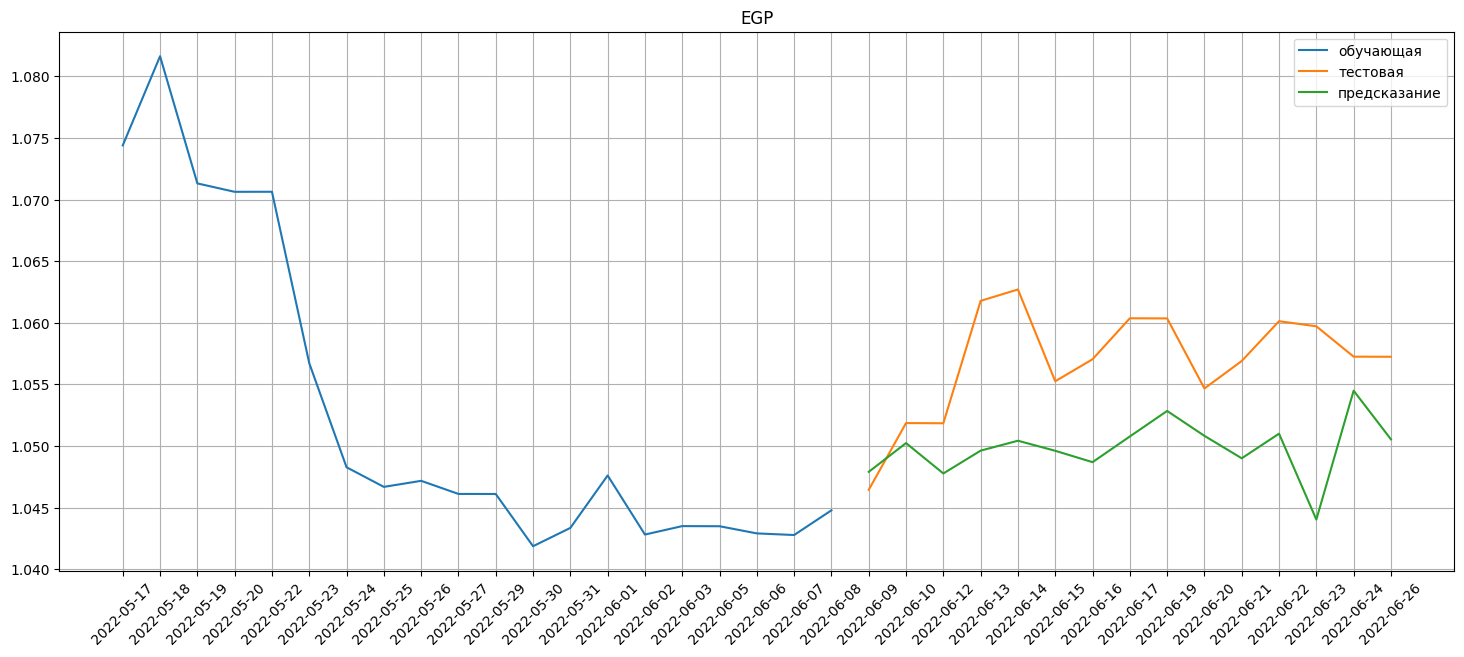


======================================== VND ========================================
2023-11-28 05:42:33,939 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.7 MiB
2023-11-28 05:42:33,942 - ApiComposer - Initial pipeline was fitted in 7.1 sec.
2023-11-28 05:42:33,945 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-28 05:42:33,964 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 52 min. Set of candidate models: ['gaussian_filter', 'sparse_lagged', 'diff_filter', 'polyfit', 'smoothing', 'ets', 'lagged', 'ts_naive_average', 'cut', 'arima', 'stl_arima', 'clstm', 'locf', 'glm', 'ar', 'linear', 'gaussian_filter', 'diff_filter', 'ridge', 'smoothing', 'isolation_forest_reg', 'clstm', 'poly_features', 'ransac_lin_reg', 'glm', 'ransac_non_lin_reg', 'lgbmreg', 'svr', 'fast_ica', 'polyfit', 'exog_ts', 'ts_naive_average', 'scaling', 'adareg',

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-28 05:57:35,020 - GroupedCondition - Optimisation finished: Early stopping iterations criteria was satisfied


Generations:   0%|          | 1/10000 [15:01<?, ?gen/s]

2023-11-28 05:57:35,053 - ApiComposer - Hyperparameters tuning started with 37 min. timeout
2023-11-28 05:57:35,184 - PipelineTuner - Initial pipeline: {'depth': 2, 'length': 2, 'nodes': [glm, data_source_ts/VND]}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
data_source_ts/VND - {} 
Initial metric: 0.000
  0%|          | 0/100000 [00:00<?, ?trial/s, best loss=?]

  3%|▎         | 3162/100000 [10:27<5:20:22,  5.04trial/s, best loss: 3.1508127044758062e-06]
2023-11-28 06:08:03,001 - PipelineTuner - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [glm, data_source_ts/VND]}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
data_source_ts/VND - {}
2023-11-28 06:08:03,005 - PipelineTuner - Final metric: 0.000
2023-11-28 06:08:03,068 - ApiComposer - Hyperparameters tuning finished
2023-11-28 06:08:03,523 - ApiComposer - Model generation finished
2023-11-28 06:08:03,648 - FEDOT logger - Final pipeline was fitted
2023-11-28 06:08:03,652 - FEDOT logger - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [glm, data_source_ts/VND]}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
data_source_ts/VND - {}
Memory consumption for finish in main session: current 3.7 MiB, max: 12.1 MiB


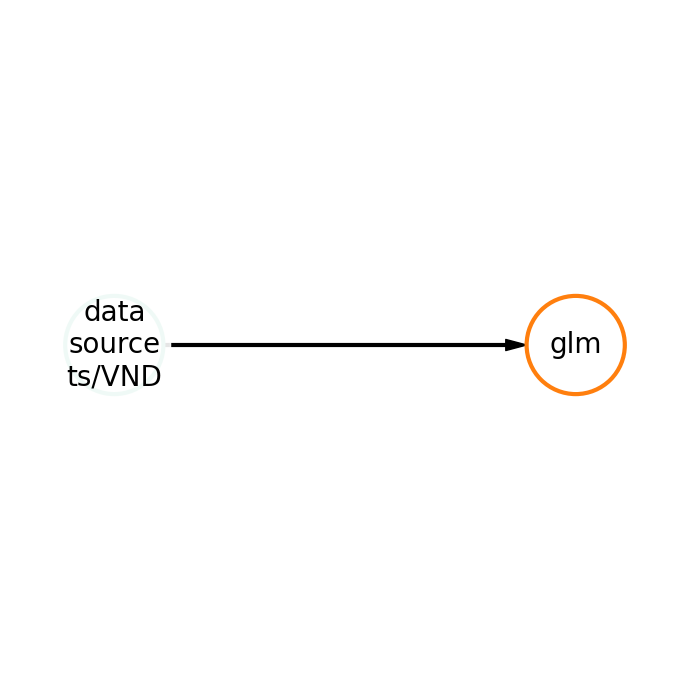

[0.00078574 0.00078579 0.00078583 0.00078588 0.00078592 0.00078597
 0.00078601 0.00078606 0.0007861 ]
{'mae': 0.0, 'mape': 0.008}


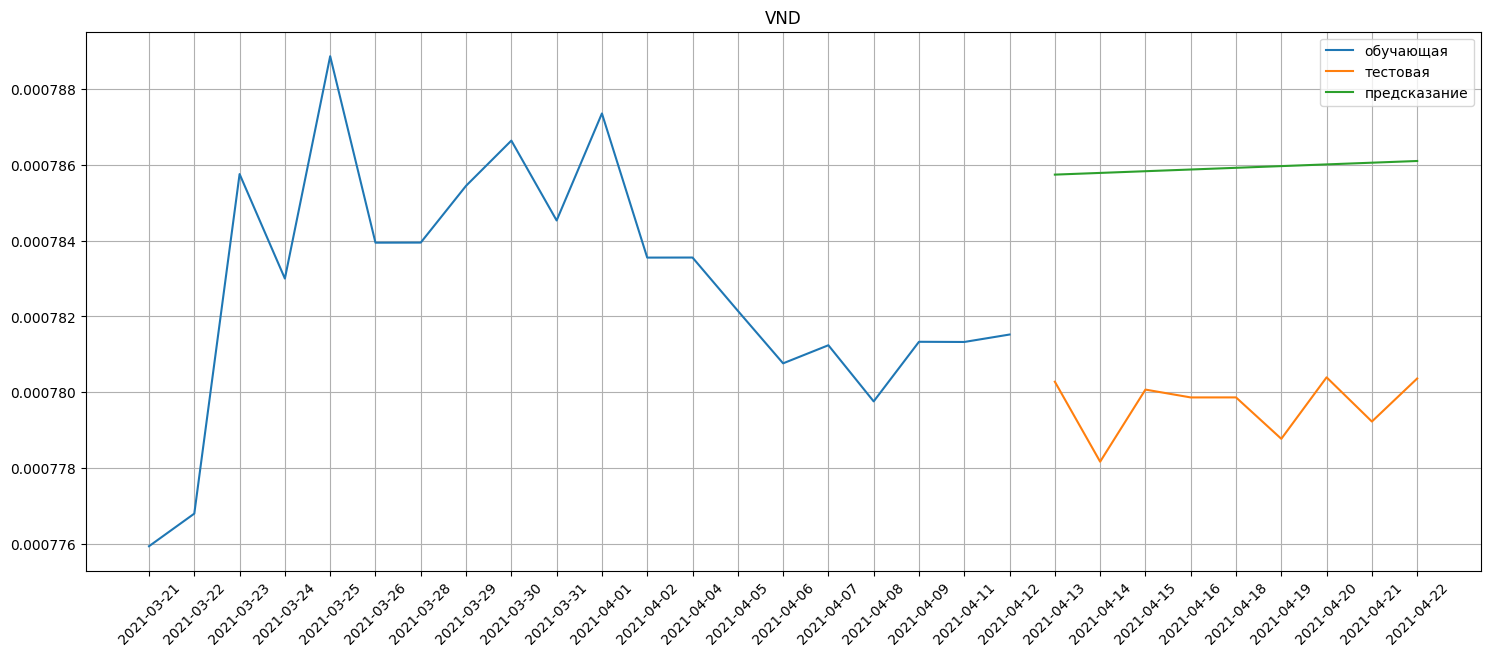


======================================== ISK ========================================
2023-11-28 06:08:24,674 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.5 MiB
2023-11-28 06:08:24,678 - ApiComposer - Initial pipeline was fitted in 11.8 sec.
2023-11-28 06:08:24,681 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-28 06:08:24,702 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 42 min. Set of candidate models: ['gaussian_filter', 'sparse_lagged', 'diff_filter', 'polyfit', 'smoothing', 'ets', 'lagged', 'ts_naive_average', 'cut', 'arima', 'stl_arima', 'clstm', 'locf', 'glm', 'ar', 'linear', 'gaussian_filter', 'diff_filter', 'ridge', 'smoothing', 'isolation_forest_reg', 'clstm', 'poly_features', 'ransac_lin_reg', 'glm', 'ransac_non_lin_reg', 'lgbmreg', 'svr', 'fast_ica', 'polyfit', 'exog_ts', 'ts_naive_average', 'scaling', 'adareg'

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-28 06:33:42,476 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [25:17<?, ?gen/s]

2023-11-28 06:33:42,505 - ApiComposer - Hyperparameters tuning started with 17 min. timeout


2023-11-28 06:33:52,055 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/ISK, dtreg, sparse_lagged]}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/ISK - {}
dtreg - {}
sparse_lagged - {'window_size': 7.563544269648371, 'n_components': 0.42528712943043573, 'sparse_transform': True, 'use_svd': True} 
Initial metric: 0.001
  0%|          | 58/100000 [15:00<520:34:49, 18.75s/trial, best loss: 0.0008557161915945294]
2023-11-28 06:50:46,080 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/ISK, dtreg, sparse_lagged]}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/ISK - {}
dtreg - {}
sparse_lagged - {'window_size': 7.563544269648371, 'n_components': 0.42528712943043573, 'sparse_transform': True, 'use_svd': True}
2023-11-28 06:50:46,087 - PipelineTuner - Final metric: 0.001
2023-11-28 06:50:46,096 - ApiCompo

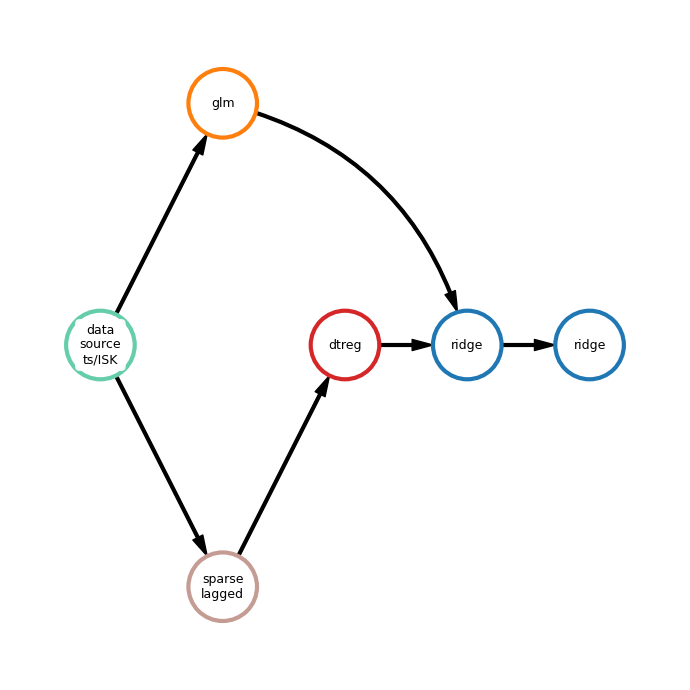

[0.14443954 0.14445359 0.14446689 0.14447939 0.14449109 0.14450132
 0.14451074 0.14451928 0.14452658 0.14453314 0.14453888]
{'mae': 0.001, 'mape': 0.005}


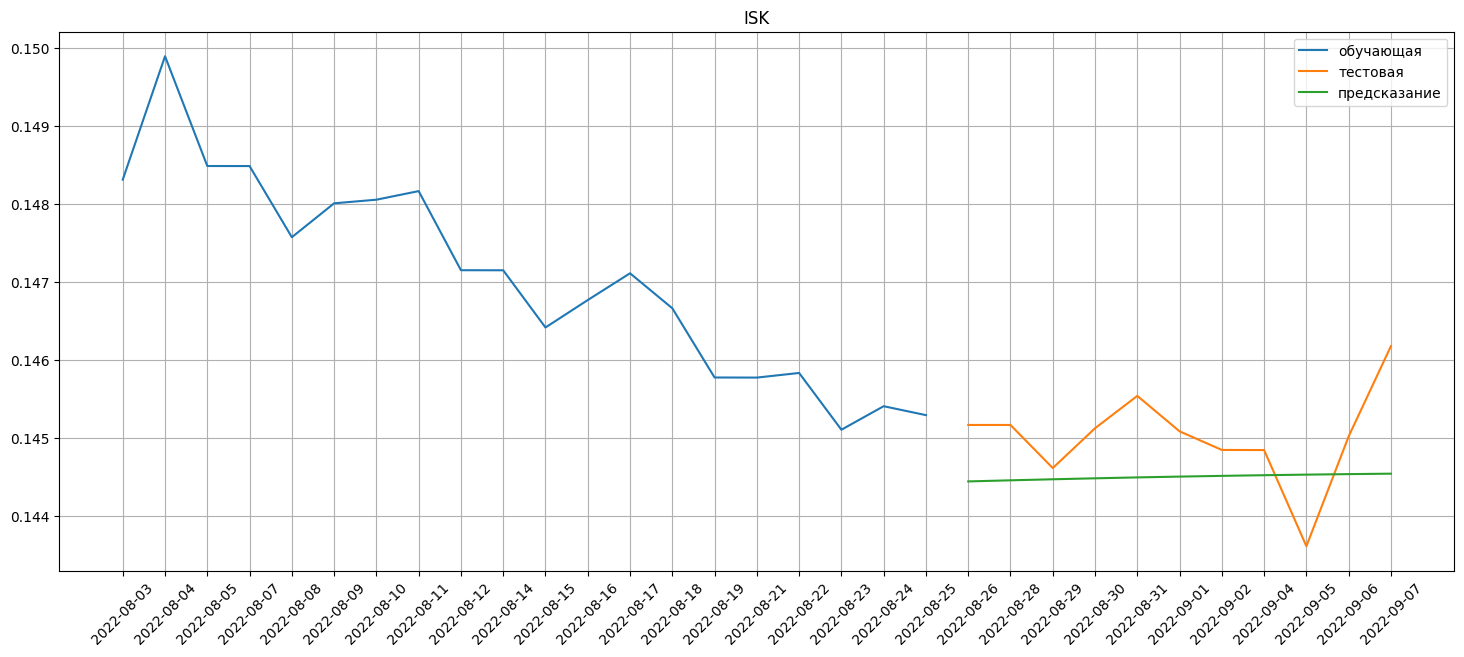


======================================== HKD ========================================
2023-11-28 06:52:12,502 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.9 MiB
2023-11-28 06:52:12,506 - ApiComposer - Initial pipeline was fitted in 16.1 sec.
2023-11-28 06:52:12,511 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-28 06:52:12,540 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 7 min. Set of candidate models: ['gaussian_filter', 'sparse_lagged', 'diff_filter', 'polyfit', 'smoothing', 'ets', 'lagged', 'ts_naive_average', 'cut', 'arima', 'stl_arima', 'clstm', 'locf', 'glm', 'ar', 'linear', 'gaussian_filter', 'diff_filter', 'ridge', 'smoothing', 'isolation_forest_reg', 'clstm', 'poly_features', 'ransac_lin_reg', 'glm', 'ransac_non_lin_reg', 'lgbmreg', 'svr', 'fast_ica', 'polyfit', 'exog_ts', 'ts_naive_average', 'scaling', 'adareg',

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-28 06:56:29,243 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [04:16<?, ?gen/s]

2023-11-28 06:56:29,265 - ApiComposer - Hyperparameters tuning started with 2 min. timeout


2023-11-28 06:56:46,396 - PipelineTuner - Initial pipeline: {'depth': 6, 'length': 7, 'nodes': [ridge, ridge, normalization, glm, data_source_ts/HKD, ridge, lagged]}
ridge - {}
ridge - {'alpha': 5.784533463274832}
normalization - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/HKD - {}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 0.006
 90%|█████████ | 9/10 [02:43<00:18, 18.12s/trial, best loss: 0.005869146841963762]
2023-11-28 06:59:29,494 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-11-28 06:59:44,683 - PipelineTuner - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [ridge, ridge, normalization, glm, data_source_ts/HKD, ridge, lagged]}
ridge - {}
ridge - {'alpha': 5.784533463274832}
normalization - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/HKD - {}
ridge - {}
lagged - {'window_size': 10}
2023-11-28 06:59:44,687 - PipelineTuner - Final metric: 0.006
2023-11-28 06:59:44,691 - ApiComposer - H

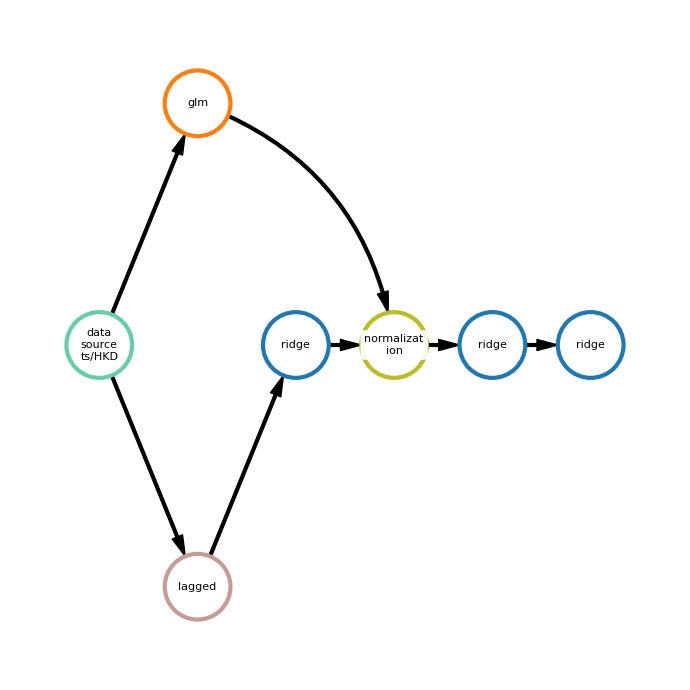

[2.64073518 2.64086154 2.64098933 2.64113726 2.64127039 2.64142888
 2.64155851]
{'mae': 0.02, 'mape': 0.008}


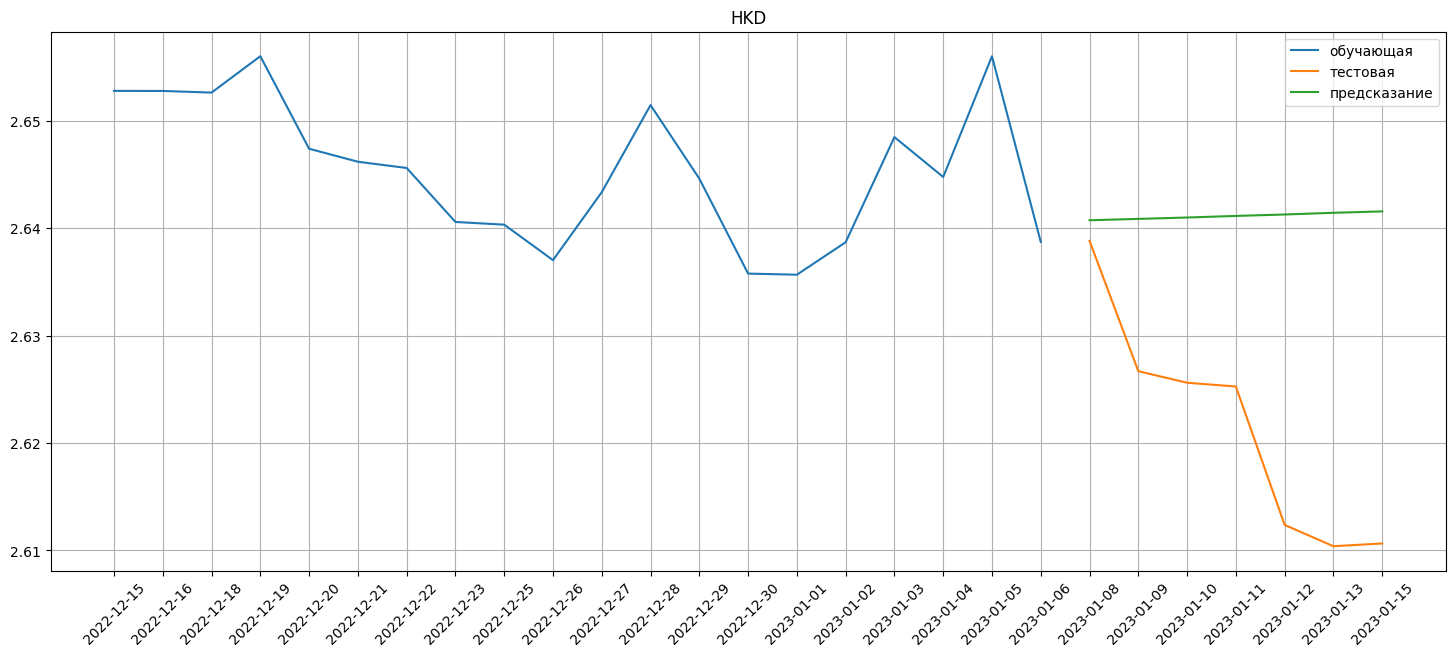


======================================== TWD ========================================
2023-11-28 07:00:13,540 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.4 MiB
2023-11-28 07:00:13,548 - ApiComposer - Initial pipeline was fitted in 9.8 sec.
2023-11-28 07:00:13,554 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-28 07:00:13,578 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 15 min. Set of candidate models: ['gaussian_filter', 'sparse_lagged', 'diff_filter', 'polyfit', 'smoothing', 'ets', 'lagged', 'ts_naive_average', 'cut', 'arima', 'stl_arima', 'clstm', 'locf', 'glm', 'ar', 'linear', 'gaussian_filter', 'diff_filter', 'ridge', 'smoothing', 'isolation_forest_reg', 'clstm', 'poly_features', 'ransac_lin_reg', 'glm', 'ransac_non_lin_reg', 'lgbmreg', 'svr', 'fast_ica', 'polyfit', 'exog_ts', 'ts_naive_average', 'scaling', 'adareg',

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-28 07:09:12,262 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [08:58<?, ?gen/s]

2023-11-28 07:09:12,294 - ApiComposer - Hyperparameters tuning started with 6 min. timeout


2023-11-28 07:09:31,541 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 10, 'nodes': [ridge, ridge, ridge, ridge, sparse_lagged, data_source_ts/TWD, dtreg, ets, linear, decompose]}
ridge - {}
ridge - {}
ridge - {}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}
data_source_ts/TWD - {}
dtreg - {}
ets - {'error': 'add', 'trend': None, 'seasonal': None, 'damped_trend': False, 'seasonal_periods': 7}
linear - {}
decompose - {} 
Initial metric: 0.001
  0%|          | 13/100000 [03:42<2059:15:50, 74.14s/trial, best loss: 0.0014057850930473288]
2023-11-28 07:16:44,491 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 10, 'nodes': [ridge, ridge, ridge, ridge, sparse_lagged, data_source_ts/TWD, dtreg, ets, linear, decompose]}
ridge - {}
ridge - {}
ridge - {}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}
data_source_ts/TWD - {}
dtreg - {}
ets - {'erro

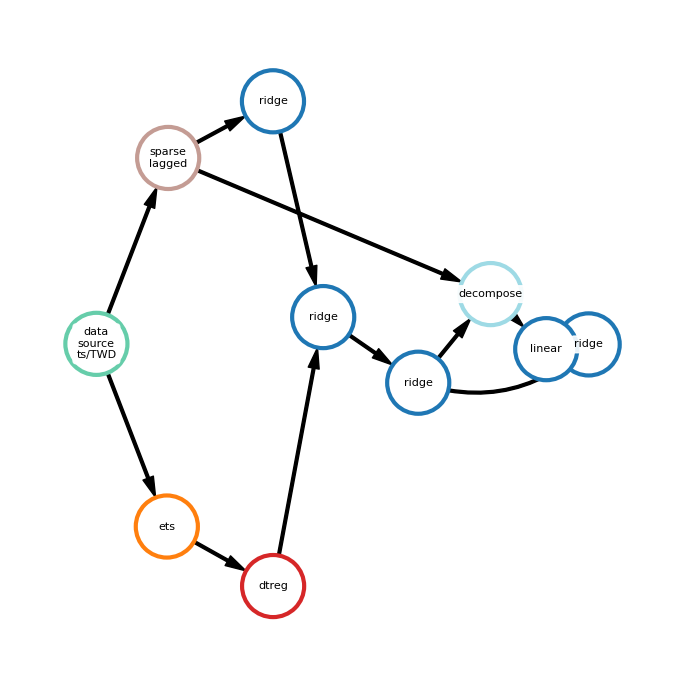

[0.63095717 0.63104348 0.63112982 0.6312164  0.6313042  0.63139511
 0.63148252 0.63156579 0.63164439 0.63172196 0.6317985  0.6318685
 0.6319279  0.63198574 0.63203854]
{'mae': 0.003, 'mape': 0.005}


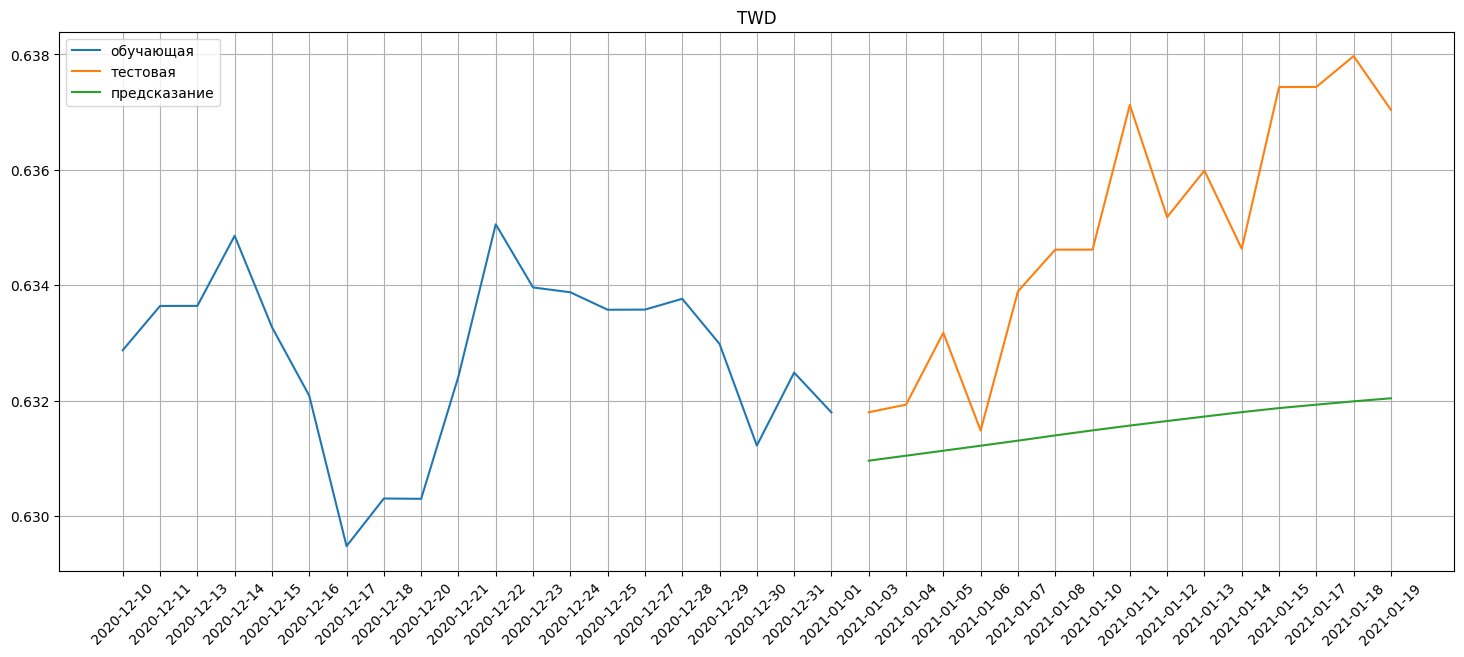


======================================== INR ========================================
2023-11-28 07:17:46,256 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.4 MiB
2023-11-28 07:17:46,259 - ApiComposer - Initial pipeline was fitted in 18.4 sec.
2023-11-28 07:17:46,264 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-28 07:17:46,286 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 14 min. Set of candidate models: ['gaussian_filter', 'sparse_lagged', 'diff_filter', 'polyfit', 'smoothing', 'ets', 'lagged', 'ts_naive_average', 'cut', 'arima', 'stl_arima', 'clstm', 'locf', 'glm', 'ar', 'linear', 'gaussian_filter', 'diff_filter', 'ridge', 'smoothing', 'isolation_forest_reg', 'clstm', 'poly_features', 'ransac_lin_reg', 'glm', 'ransac_non_lin_reg', 'lgbmreg', 'svr', 'fast_ica', 'polyfit', 'exog_ts', 'ts_naive_average', 'scaling', 'adareg'

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-28 07:23:24,543 - GroupedCondition - Optimisation finished: Early stopping iterations criteria was satisfied


Generations:   0%|          | 1/10000 [05:38<?, ?gen/s]

2023-11-28 07:23:24,590 - ApiComposer - Hyperparameters tuning started with 8 min. timeout


2023-11-28 07:24:05,883 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [treg, ridge, ridge, glm, data_source_ts/INR, ridge, lagged, linear, decompose]}
treg - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/INR - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.000
  0%|          | 11/100000 [00:44<1247:15:40, 44.91s/trial, best loss: 0.0003364629450016451]
2023-11-28 07:32:48,541 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [treg, ridge, ridge, glm, data_source_ts/INR, ridge, lagged, linear, decompose]}
treg - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/INR - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
2023-11-28 07:32:48,545 - PipelineTuner - Final metric: 0.000
2023-11-28 07:32:48,552 - ApiComposer - Hyperparameters tuning finished
2023-11-28 07:32:49,241 - ApiComposer - Model generatio

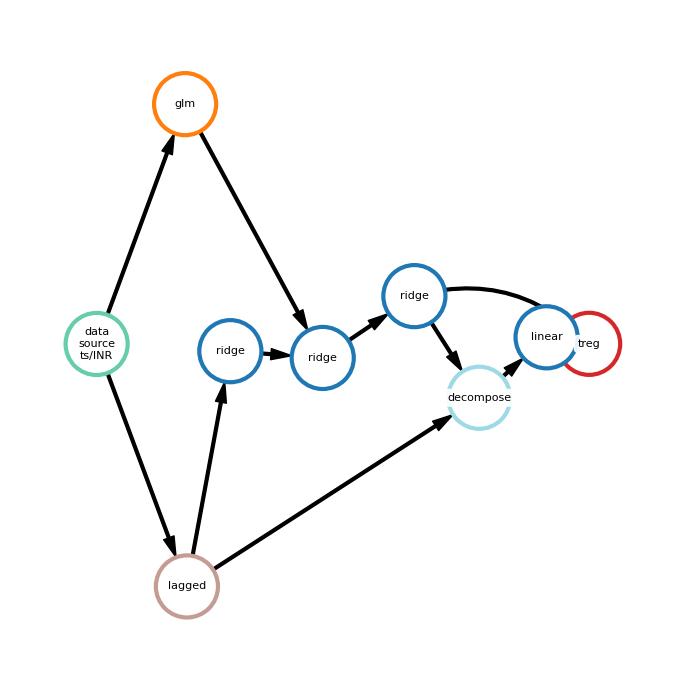

[0.25102536 0.25107639 0.25079292 0.25065   ]
{'mae': 0.002, 'mape': 0.007}


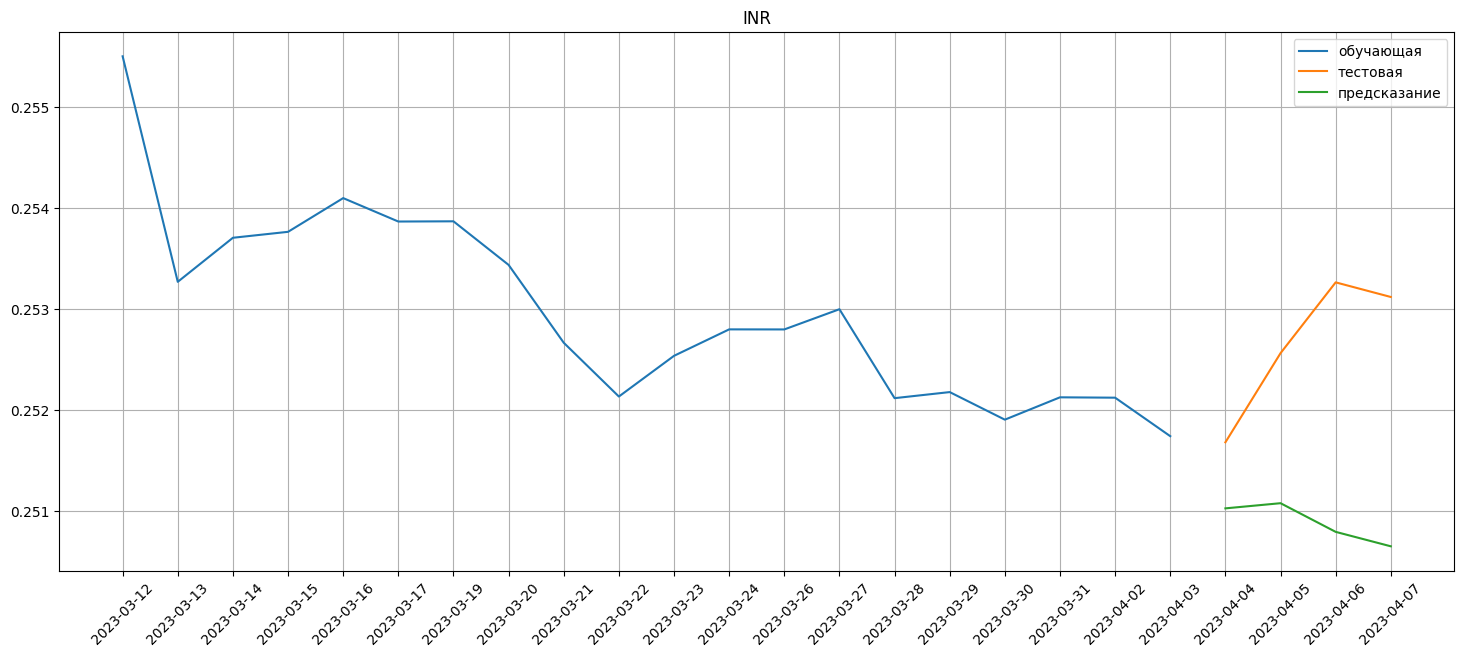


======================================== MXN ========================================
2023-11-28 07:34:03,261 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.9 MiB
2023-11-28 07:34:03,266 - ApiComposer - Initial pipeline was fitted in 9.4 sec.
2023-11-28 07:34:03,270 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-28 07:34:03,291 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 44 min. Set of candidate models: ['gaussian_filter', 'sparse_lagged', 'diff_filter', 'polyfit', 'smoothing', 'ets', 'lagged', 'ts_naive_average', 'cut', 'arima', 'stl_arima', 'clstm', 'locf', 'glm', 'ar', 'linear', 'gaussian_filter', 'diff_filter', 'ridge', 'smoothing', 'isolation_forest_reg', 'clstm', 'poly_features', 'ransac_lin_reg', 'glm', 'ransac_non_lin_reg', 'lgbmreg', 'svr', 'fast_ica', 'polyfit', 'exog_ts', 'ts_naive_average', 'scaling', 'adareg',

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-28 07:58:37,019 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [24:33<?, ?gen/s]

2023-11-28 07:58:37,045 - ApiComposer - Hyperparameters tuning started with 19 min. timeout


2023-11-28 07:59:00,041 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 5, 'nodes': [lgbmreg, linear, ridge, lagged, data_source_ts/MXN]}
lgbmreg - {'num_leaves': 57, 'colsample_bytree': 0.7344531825595044, 'subsample': 0.5332629760190865, 'subsample_freq': 10, 'learning_rate': 0.0416132699269125, 'n_estimators': 100, 'reg_alpha': 2.9623108114141856e-07, 'reg_lambda': 8.251326063937944e-05}
linear - {}
ridge - {}
lagged - {'window_size': 14.114597733959787}
data_source_ts/MXN - {} 
Initial metric: 0.007
  0%|          | 44/100000 [15:07<740:57:43, 26.69s/trial, best loss: 0.007092745797806221]
2023-11-28 08:18:25,489 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 5, 'nodes': [lgbmreg, linear, ridge, lagged, data_source_ts/MXN]}
lgbmreg - {'num_leaves': 57, 'colsample_bytree': 0.7344531825595044, 'subsample': 0.5332629760190865, 'subsample_freq': 10, 'learning_rate': 0.0416132699269125, 'n_estimators': 100, 'reg_alpha': 2.9623108114141856e-07, 'reg_lambda': 8.251326

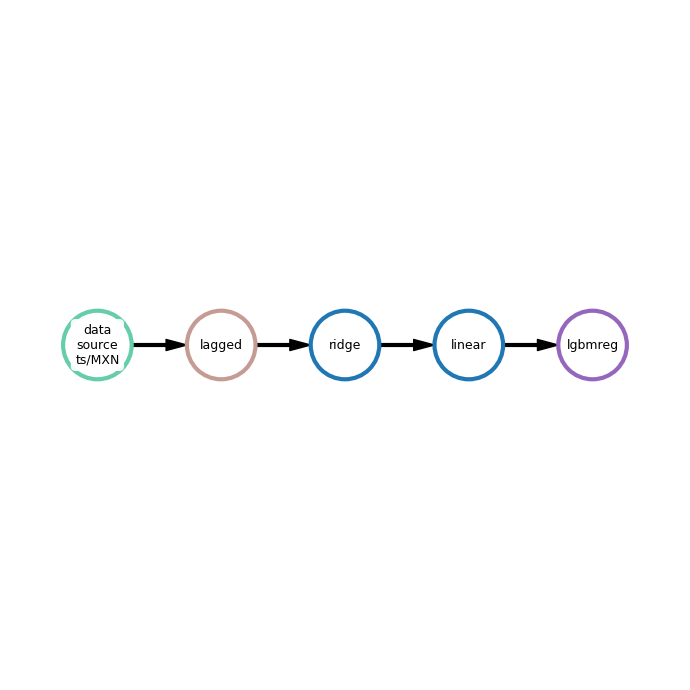

[0.85224278 0.85012258 0.85093759 0.85027622 0.84686533 0.84705675
 0.83788843 0.84108233 0.83962823 0.84305556 0.84054628]
{'mae': 0.023, 'mape': 0.026}


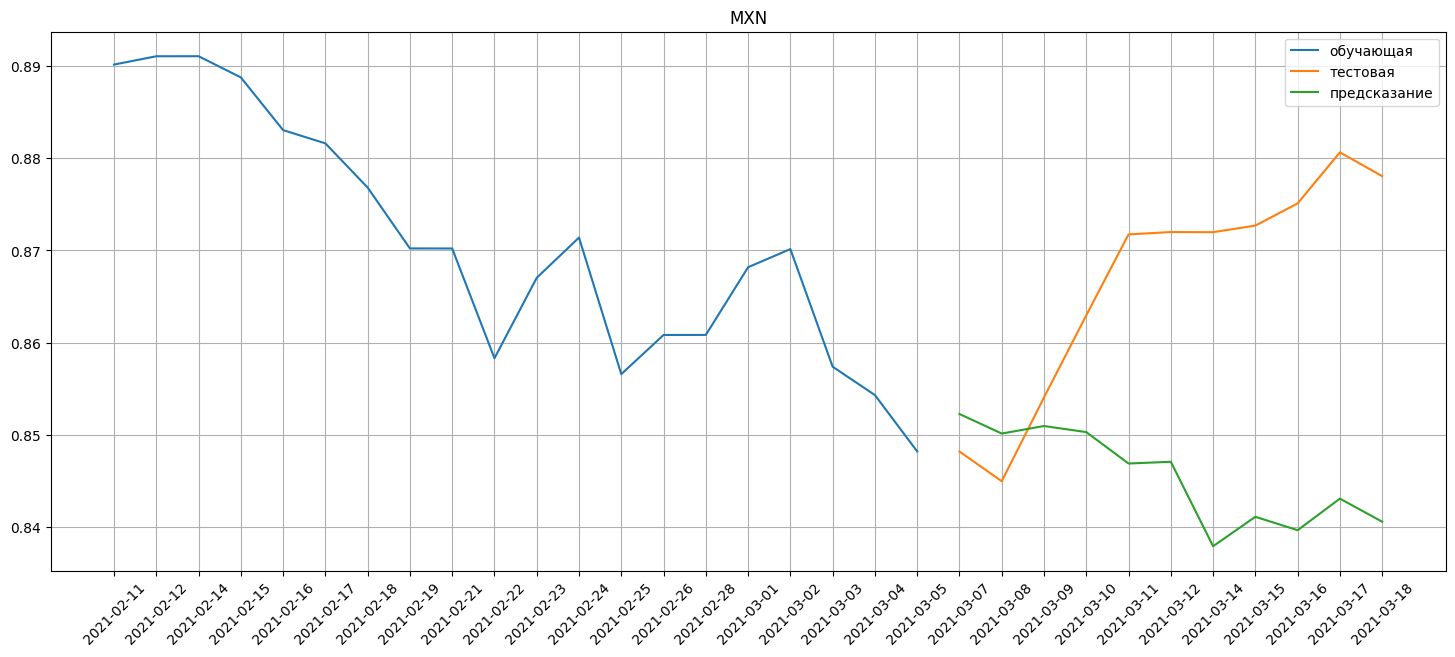


======================================== TWD ========================================
2023-11-28 08:19:58,006 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 4.3 MiB
2023-11-28 08:19:58,011 - ApiComposer - Initial pipeline was fitted in 17.7 sec.
2023-11-28 08:19:58,028 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-28 08:19:58,057 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 47 min. Set of candidate models: ['gaussian_filter', 'sparse_lagged', 'diff_filter', 'polyfit', 'smoothing', 'ets', 'lagged', 'ts_naive_average', 'cut', 'arima', 'stl_arima', 'clstm', 'locf', 'glm', 'ar', 'linear', 'gaussian_filter', 'diff_filter', 'ridge', 'smoothing', 'isolation_forest_reg', 'clstm', 'poly_features', 'ransac_lin_reg', 'glm', 'ransac_non_lin_reg', 'lgbmreg', 'svr', 'fast_ica', 'polyfit', 'exog_ts', 'ts_naive_average', 'scaling', 'adareg'

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-28 08:48:11,142 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [28:13<?, ?gen/s]

2023-11-28 08:48:11,170 - ApiComposer - Hyperparameters tuning started with 18 min. timeout


2023-11-28 08:48:11,443 - PipelineTuner - Initial pipeline: {'depth': 4, 'length': 4, 'nodes': [ridge, ridge, polyfit, data_source_ts/TWD]}
ridge - {}
ridge - {}
polyfit - {'degree': 2}
data_source_ts/TWD - {} 
Initial metric: 0.002
  2%|▏         | 2487/100000 [18:26<12:06:14,  2.24trial/s, best loss: 0.00217206789222548]
2023-11-28 09:06:40,773 - PipelineTuner - Final pipeline: {'depth': 4, 'length': 4, 'nodes': [ridge, ridge, polyfit, data_source_ts/TWD]}
ridge - {'alpha': 9.474913416953935}
ridge - {'alpha': 5.464658833017835}
polyfit - {'degree': 4}
data_source_ts/TWD - {}
2023-11-28 09:06:40,777 - PipelineTuner - Final metric: 0.002
2023-11-28 09:06:40,862 - ApiComposer - Hyperparameters tuning finished
2023-11-28 09:06:41,392 - ApiComposer - Model generation finished
2023-11-28 09:06:41,616 - FEDOT logger - Final pipeline was fitted
2023-11-28 09:06:41,620 - FEDOT logger - Final pipeline: {'depth': 4, 'length': 4, 'nodes': [ridge, ridge, polyfit, data_source_ts/TWD]}
ridge - {'a

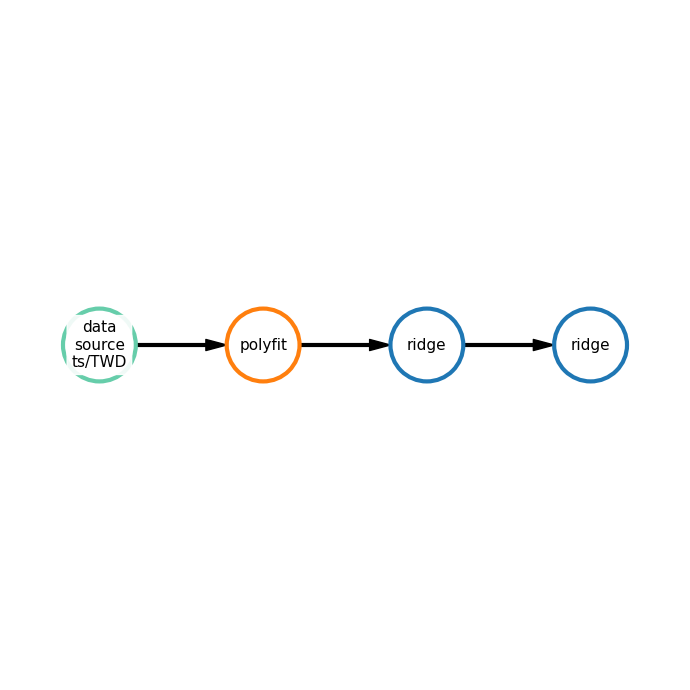

[0.64574053 0.64583855 0.64592465 0.64600615 0.64608848 0.64617485
 0.64626159 0.64634759 0.64643688 0.64652623 0.64661811 0.64671157
 0.64680165 0.64689338 0.64698054 0.64707478 0.64717186 0.64726595
 0.64735728 0.6474501 ]
{'mae': 0.005, 'mape': 0.007}


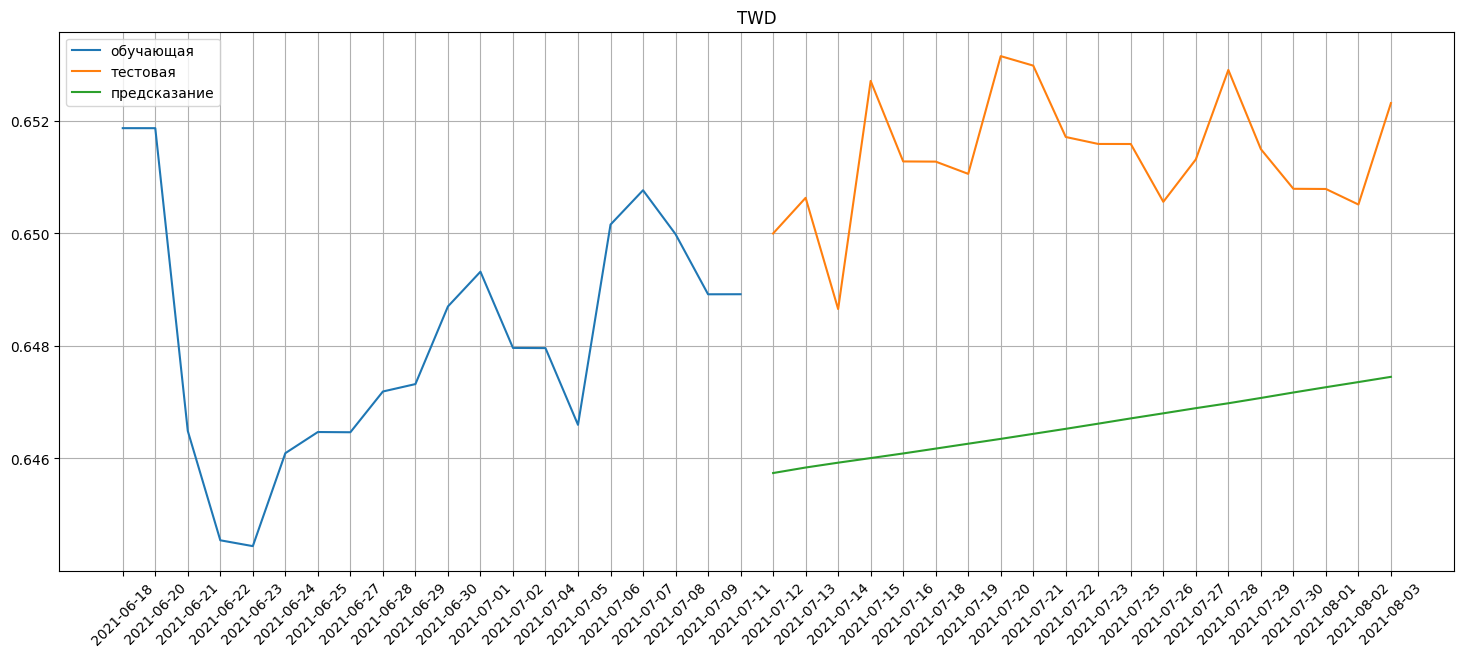

In [7]:
start_time = time.time()

while True:
    
    item = {}
    item['time'] = time.localtime()
    
    print()
    
    elapsed_time = time.time() - start_time
    
    if elapsed_time > 6*60*60:
        break
    
    target_name = random.choice(abscur_data.columns)
    print('='*40, target_name, '='*40)
    
    item['target_name'] = target_name
    
    forecast_length = random.randint(2,20)
    item['forecast_length'] = forecast_length
    
    # случайный сдвиг назад (случайная точка)
    
    delta = random.randint(0,1000-1)
    item['delta'] = delta
    
    # Сборка датасета
    
    target_train = np.ravel(abscur_data[target_name].values[:-forecast_length-delta])
    target_test = np.ravel(abscur_data[target_name].values[-forecast_length-delta:-delta])
    
    item['target_test'] = target_test

    idx_train = abscur_data.index[:-forecast_length-delta]
    idx_test = abscur_data.index[-forecast_length-delta:-delta]
    
    item['idx_test'] = list(idx_test)
    
    historical_data_inp = {}

    inp_name = target_name
    
    historical_data_inp[inp_name] = target_train
            
    # Сборка модели
    
    timeout = random.randint(1,60)
    item['timeout'] = timeout
    
    fedot = Fedot(problem='ts_forecasting',
                  task_params=TsForecastingParams(forecast_length=forecast_length),
                  timeout=timeout)
    
    # Обучение модели
    
    fedot.fit(features=historical_data_inp,
              target=historical_data_inp[target_name])
    
    # Вид сети
    
    fedot.current_pipeline.show()
    model_struct_file = target_name + '_' + str(len(history)) + '_model.png'
    fedot.current_pipeline.show(save_path=model_struct_file)
    item['model_struct_file'] = model_struct_file
    
    model_struct = fedot.current_pipeline.structure
    item['model_struct'] = model_struct
    
    # Предсказание
    
    forecast = fedot.predict(historical_data_inp,in_sample=False)
    print(forecast)
    item['forecast'] = forecast
    
    # Расчет метрик
    
    metrics = fedot.get_metrics(target_test,metric_names=['mae','mape'])
    print(metrics)
    item['metrics'] = metrics
    
    # График
    
    plt.plot(idx_train[-20:],target_train[-20:],label='обучающая')
    plt.plot(idx_test,target_test,label='тестовая')
    plt.plot(idx_test,forecast,label='предсказание')
    plt.grid()
    plt.legend()
    plt.title(target_name)
    plt.xticks(rotation=45)
    
    plot_file = target_name + '_' + str(len(history)) + '_plot.png'
    plt.savefig(plot_file)
    item['plot_file'] = plot_file
    
    plt.show()
    
    history.append(item)
    
#     break

with open("history.pickle", "wb") as file:
    pickle.dump(history, file)

# Аналитика

In [8]:
rep = pd.DataFrame()
rep['time'] = list(item['time'] for item in history)
rep['target_name'] = list(item['target_name'] for item in history)
rep['forecast_length'] = list(item['forecast_length'] for item in history)
rep['delta'] = list(item['delta'] for item in history)
rep['timeout'] = list(item['timeout'] for item in history)
rep['mape'] = list(item['metrics']['mape'] for item in history)
rep

,time,target_name,forecast_length,delta,timeout,mape
0,"(2023, 11, 5, 18, 12, 27, 6, 309, 0)",AED,10,942,1,0.004
1,"(2023, 11, 5, 18, 16, 20, 6, 309, 0)",ZAR,10,583,1,0.011
2,"(2023, 11, 5, 18, 17, 52, 6, 309, 0)",MYR,10,216,1,0.010
3,"(2023, 11, 5, 18, 19, 45, 6, 309, 0)",QAR,10,307,1,0.011
4,"(2023, 11, 5, 18, 21, 29, 6, 309, 0)",COP,10,633,1,0.106
...,...,...,...,...,...,...
278,"(2023, 11, 28, 6, 51, 1, 1, 332, 0)",HKD,7,271,7,0.008
279,"(2023, 11, 28, 7, 0, 1, 1, 332, 0)",TWD,15,893,15,0.005
280,"(2023, 11, 28, 7, 17, 15, 1, 332, 0)",INR,4,200,14,0.007
281,"(2023, 11, 28, 7, 33, 47, 1, 332, 0)",MXN,11,843,44,0.026


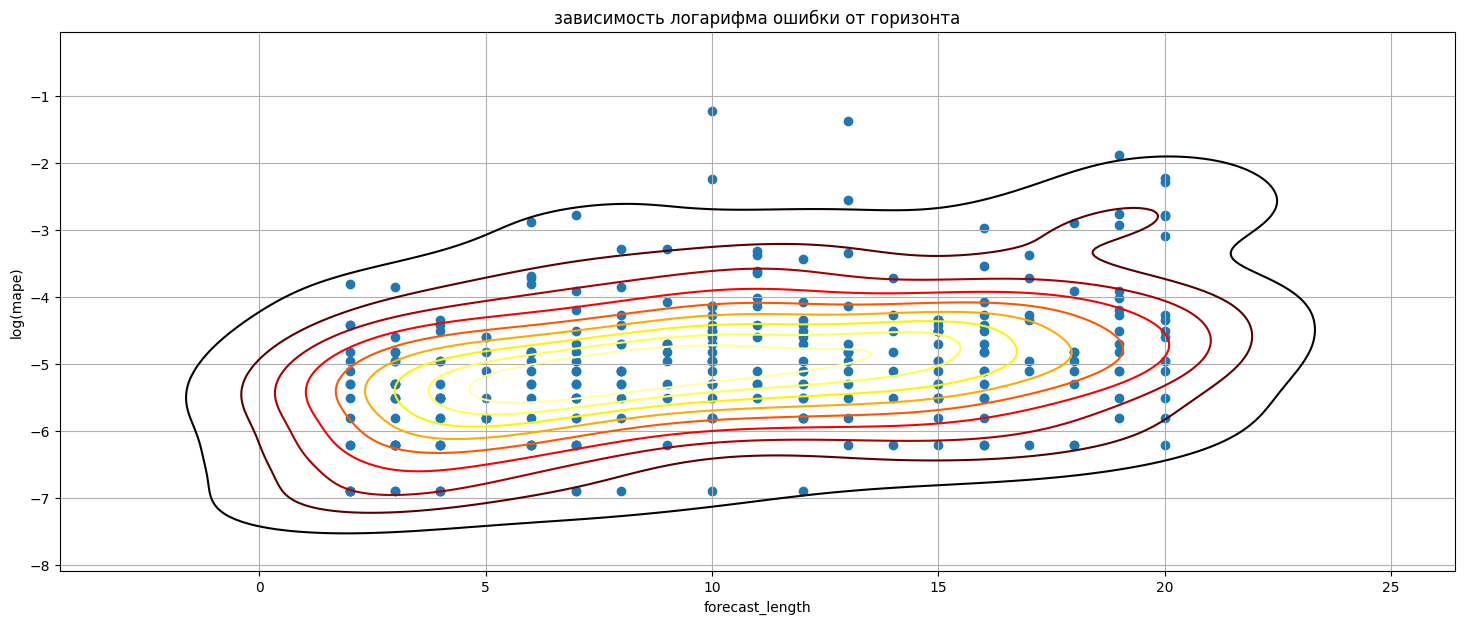

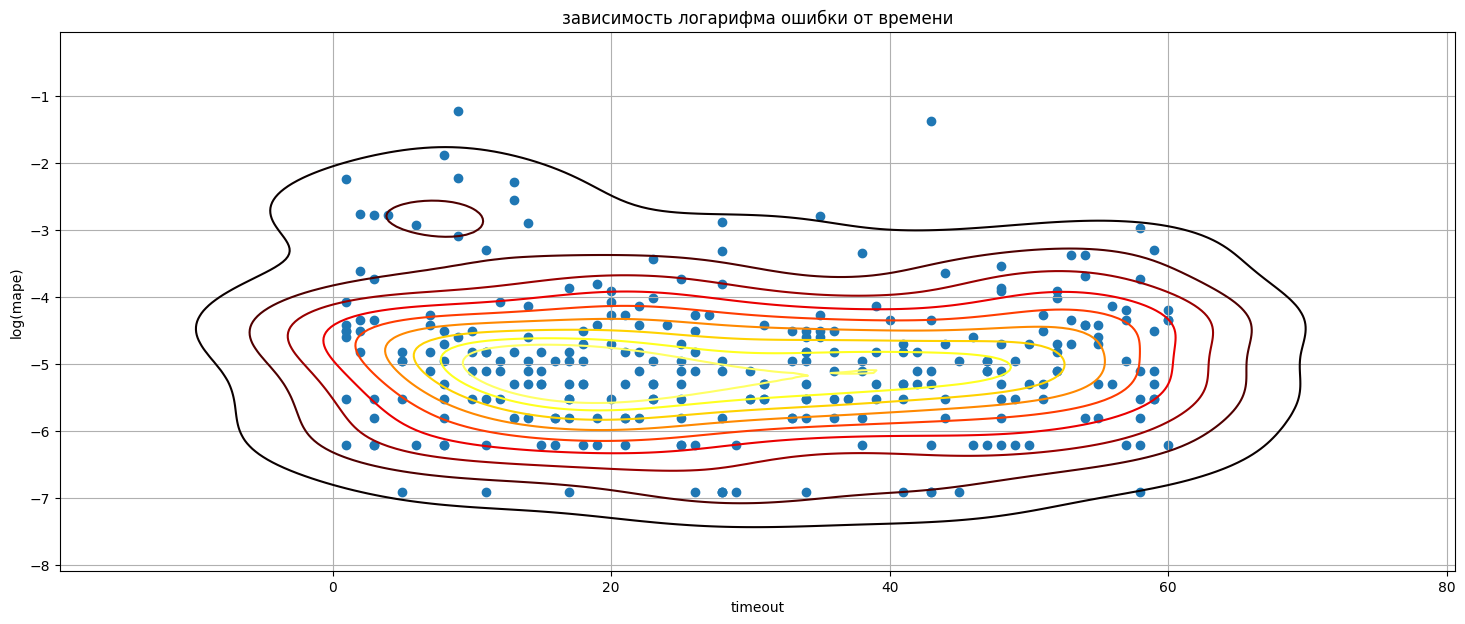

In [9]:
import seaborn as sns

rep['log(mape)'] = np.log(rep['mape'])

sns.kdeplot(data=rep,x='forecast_length',y='log(mape)',cmap='hot')
plt.scatter(rep['forecast_length'],rep['log(mape)'])
plt.ylabel('log(mape)')
plt.title('зависимость логарифма ошибки от горизонта')
plt.grid()
plt.show()

sns.kdeplot(data=rep,x='timeout',y='log(mape)',cmap='hot')
plt.scatter(rep['timeout'],rep['log(mape)'])
plt.ylabel('log(mape)')
plt.title('зависимость логарифма ошибки от времени')
plt.grid()
plt.show()